# **Demo 2** 

Dataset: [Men's Tennis Grand Slam Champions](https://www.kaggle.com/datasets/wonduk/mens-tennis-grand-slam-winner-dataset/data)

Selection rationale: I chose this dataset because I am interested in tennis and want to learn more about the different Grand Slam Champions throughout the years.

---

### Analysis Objectives & Plan 

1. Proportion of left-handed Grand Slam winners over the years. 
- Count number of left-handed, right-handed, and total number of Grand Slam winners.
- Calculate proportion of left vs right-handed winners. 
- Visualize data by plotting a pie chart. 
2. World ranking during Grand Slam win & likelihood of world #1 to win if they made the final.
- Count number of Grand Slam Winners who had a world ranking of #1. Do the same for each winning world ranking available. 
- Visualize this data using a bar plot. 
- Count number of runner-ups with rank #1 and total number of #1 present in finals.
- Calculate the probability that a #1 ranked player will win the Grand Slam if they make it to the finals.
3. Novak Djokovic total Grand Slam earnings. 
- Identify every Grand Slam that Djokovic has won (*hint*: there's a lot!) and store this in a new dataframe.
- Of this dataframe, retain only the columns containing the tournament and the price money won.
- For each Grand Slam earning, convert price money to CAD. Add together the price money won. 
- Identify in which year Djokovic made his highest earnings.

---

### Import Libraries 

In [155]:
# Import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Import and Explore Data 

- Import dataset and assign to a variable named `winners`
- Print/output the following (as pythonically as possible) 
    - Dataframe's shape 
    - Column names 
    - First 5 rows 

In [156]:
# Import data from csv file 
winners = pd.read_csv('Mens_Tennis_Grand_Slam_Winner.csv')

In [157]:
# df shape 
winners.shape

(292, 10)

In [158]:
# df columns 
winners.columns

Index(['YEAR', 'TOURNAMENT', 'WINNER', 'RUNNER-UP', 'WINNER_NATIONALITY',
       'WINNER_ATP_RANKING', 'RUNNER-UP_ATP_RANKING',
       'WINNER_LEFT_OR_RIGHT_HANDED', 'TOURNAMENT_SURFACE', 'WINNER_PRIZE'],
      dtype='object')

In [164]:
# output first 5 rows 
winners.head() 

,YEAR,TOURNAMENT,WINNER,RUNNER-UP,WINNER_NATIONALITY,WINNER_ATP_RANKING,RUNNER-UP_ATP_RANKING,WINNER_LEFT_OR_RIGHT_HANDED,TOURNAMENT_SURFACE,WINNER_PRIZE
0,2023,Australian Open,Novak Djokovic,Stefanos Tsitsipas,Serbian,1.0,3.0,right,Plexicushion Prestige,2050000.0
1,2022,U.S. Open,Carlos Alcaraz,Casper Rudd,Spanish,2.0,5.0,right,DecoTurf - outdoors,2600000.0
2,2022,Wimbledon,Novak Djokovic,Nick Kyrgios,Serbian,NaN,25.0,right,Grass / Outdoor,2507460.0
3,2022,French Open,Rafael Nadal,Casper Rudd,Spanish,5.0,8.0,left,Clay,1870000.0
4,2022,Australian Open,Rafael Nadal,Daniil Medvedev,Spanish,5.0,2.0,left,Plexicushion Prestige,4400000.0


---

##### 1. Proportion of left-handed Grand Slam winners over the years.

In [160]:
# Count number of left-handed, right-handed, and total number of winners in 'winner_left_or_right_handed' column. 
# I use value_counts() to count the number of unique values in a column. This will output a panda series. 
left_and_right_winners = winners['WINNER_LEFT_OR_RIGHT_HANDED'].value_counts()

# index the above series to get the number of left-handed winners
left_handed_winners = left_and_right_winners[1]

# index the above series to get the number of right-handed winners
right_handed_winners = left_and_right_winners[0]

# calculate total number of winners
total_winners = left_handed_winners + right_handed_winners


print('The number of left handed winners is:', left_handed_winners, '\nThe number of right handed winners is:', right_handed_winners, '\nThe total number of winners is:', total_winners)

The number of left handed winners is: 65 
The number of right handed winners is: 227 
The total number of winners is: 292


In [161]:
# Calculate the proportion of left-handed winners vs right handed winners
# I use the round() function to round the proportion to 2 decimal places
left_handed_proportion = round(left_handed_winners/total_winners,2)

right_handed_proportion = round(right_handed_winners/total_winners,2)


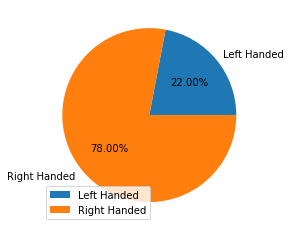

In [207]:
# Create a pie chart to visualize the proportion of left-handed winners vs right-handed winners
# I use the plt.pie() function to create a pie chart, the plt.legend() function to add a legend to the pie chart and
# the plt.show() function to display the pie chart.
# Display percentages on the pie chart using the autoptc parameter, and rounding to 2 decimal places. 
plt.pie([left_handed_proportion, right_handed_proportion], labels = ['Left Handed', 'Right Handed'], autopct = '%.2f%%')
plt.legend()
plt.show()

##### World ranking during Grand Slam win & likelihood of world #1 to win if they made the final.

In [188]:
# Count number of Grand Slam Winners who had a world ranking of #1. Do the same for each world ranking available in the winners column. 
# NOTE: rankings are only available past the year of 2006, hence the low number of total rankings. 
# I use value_counts() to count the number of unique values in a column. This will output a panda series.
winners_rankings = winners['WINNER_ATP_RANKING'].value_counts()

# Create a dictionary of the available winners' rankings and their corresponding number of winners. 
winners_rankings.to_dict()

{1.0: 32, 2.0: 17, 3.0: 5, 4.0: 5, 5.0: 3, 9.0: 1}

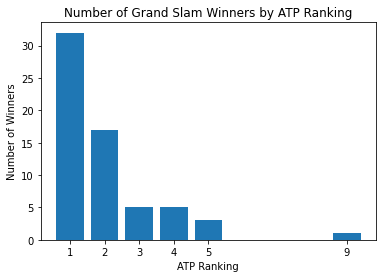

In [167]:
# Create a bar plot to visualize this data.
# I use the plt.bar() function to create a bar plot. 
plt.bar(winners_rankings.keys(), winners_rankings.values)

# Label all bins to each corresponding ATP ranking.
# I use the plt.xticks() function to label each bin.
plt.xticks(winners_rankings.keys())

# I use the plt.xlabel() function to add a label to the x-axis and the plt.ylabel() function to add a label to the y-axis.
# I use the plt.title() function to add a title to the bar plot.
plt.xlabel('ATP Ranking')
plt.ylabel('Number of Winners')
plt.title('Number of Grand Slam Winners by ATP Ranking')

# I use the plt.show() function to display the bar plot.
plt.show()

In [206]:
# Count number of runner-ups with rank #1 and total number of #1 present in finals.
# Count the number of runner ups with RUNNER-UP_ATP_RANKING = 1. 
# Use a for loop to iterate through the RUNNER-UP_ATP_RANKING column and an if statement to check if the runner up's ranking is equal to 1.
# If the runner up's ranking is equal to 1, add 1 to the counter variable.
runner_ups_rank_1 = 0

for i in winners['RUNNER-UP_ATP_RANKING']:
    if i == 1:
        runner_ups_rank_1 += 1

print('There were a total number of', runner_ups_rank_1, 'runner ups with a ranking of #1.')

# Sum the number of times a player with a ranking of #1 was present in the finals.
total_rank1_in_finals = runner_ups_rank_1 + winners_rankings[1.0]

print('There were a total number of', total_rank1_in_finals, 'players with a ranking of #1 present in the finals.')

There were a total number of 13 runner ups with a ranking of #1.
There were a total number of 45 players with a ranking of #1 present in the finals.


In [169]:
# Calculate the probability that a #1 ranked player will win the Grand Slam if they make it to the finals.
# Use statistical analysis to do this. 
# The probability of an event is equal to the number of times the event occurs divided by the total number of possible outcomes.
# The event is a #1 ranked player winning the Grand Slam if they make it to the finals.
# The total number of possible outcomes is the number of times a #1 ranked player was present in the finals.
winners_rank_1 = total_rank1_in_finals - runner_ups_rank_1

probability_rank1_wins = winners_rank_1 / total_rank1_in_finals

# Use the round function to round the probability to 2 decimal places.
probability_rank1_wins = round(probability_rank1_wins*100, 2)

print('The probability that a #1 ranked player will win the Grand Slam if they make it to the finals is:', probability_rank1_wins, '%.')

The probability that a #1 ranked player will win the Grand Slam if they make it to the finals is: 71.11 %.


##### Identify Novak Djokovic's total Grand Slam earnings. 

In [205]:
# Identify every Grand Slam that Djokovic has won (*hint*: there's a lot!) and store this in a new data frame. 
# I use the .loc() function to index the dataframe.
# I use the .str.contains() function to identify every Grand Slam that Djokovic has won.
# I store this data in a new dataframe called djokovic_wins and set the index to the YEAR column.
djokovic_wins = winners.loc[winners['WINNER'].str.contains('Djokovic')]

djokovic_wins.set_index('YEAR', inplace = True)


In [174]:
# Of this dataframe, retain only the columns containing the tournament and the price money won.
# I use the .loc() function to index the dataframe.
djokovic_wins = djokovic_wins.loc[:, ['TOURNAMENT', 'WINNER_PRIZE']]

djokovic_wins.head()

,TOURNAMENT,WINNER_PRIZE
YEAR,,
2023,Australian Open,2050000.0
2022,Wimbledon,2507460.0
2021,Wimbledon,1700000.0
2021,French Open,1400000.0
2021,Australian Open,2875000.0


In [189]:
# For each Grand Slam earning, convert price money to CAD. Add together the price money won. 
# Loop through the dataframe and identify what currency of the price money based on the tournament.

# Create a new column called 'WINNER_PRIZE_CAD' and set its values equal to 0.
djokovic_wins['WINNER_PRIZE_CAD'] = 0

# Create a for loop to iterate through the dataframe.
# Use an if statement to check the currency of the price money based on the tournament.
# NOTE: the conversion rates are based on the current exchange rate. 
# If the currency is USD, multiply the price money by 1.37 to convert to CAD.
# If the currency is EUR, multiply the price money by 1.45 to convert to CAD.
# If the currency is GBP, multiply the price money by 1.67 to convert to CAD.
# If the currency is AUD, multiply the price money by 0.87 to convert to CAD.

for i in djokovic_wins['WINNER_PRIZE']:
    if i == 'U.S. OPEN':
        djokovic_wins['WINNER_PRIZE_CAD'] = djokovic_wins['WINNER_PRIZE'] * 1.37

    if i == 'French Open': 
        djokovic_wins['WINNER_PRIZE_CAD'] = djokovic_wins['WINNER_PRIZE'] * 1.45
    
    if i == 'Wimbledon':
        djokovic_wins['WINNER_PRIZE_CAD'] = djokovic_wins['WINNER_PRIZE'] * 1.67

    else: 
        djokovic_wins['WINNER_PRIZE_CAD'] = djokovic_wins['WINNER_PRIZE'] * 0.87

# Add together the price money won in CAD. 
# I use the .sum() function to add together the price money won in CAD.
djokovic_total_winnings_CAD = djokovic_wins['WINNER_PRIZE_CAD'].sum()

# print the value as an integer in a statement. 
print('Djokovic has won a total of $', int(djokovic_total_winnings_CAD), 'CAD in Grand Slam prize money.')

Djokovic has won a total of $ 46799440 CAD in Grand Slam prize money.


/var/folders/tt/rlj2czv54n51nmm7h3llcz2h0000gn/T/ipykernel_97229/3443024850.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  djokovic_wins['WINNER_PRIZE_CAD'] = 0
/var/folders/tt/rlj2czv54n51nmm7h3llcz2h0000gn/T/ipykernel_97229/3443024850.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  djokovic_wins['WINNER_PRIZE_CAD'] = djokovic_wins['WINNER_PRIZE'] * 0.87


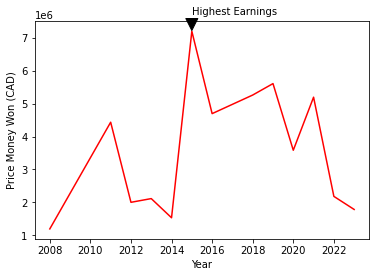

Djokovic made his highest earnings in the year 2015 , with a total of $ 7203600 CAD.


In [204]:
# Identify in which year Djokovic made his highest earnings.
# Calculate price money won for each year. 
# I use the .groupby() function to group the dataframe by year.
# I use the .sum() function to add together the price money won in CAD for each year.
djokovic_wins_by_year = djokovic_wins.groupby('YEAR').sum()

# Identify the year in which Djokovic made his highest earnings.
# I use the .idxmax() function to identify the year in which Djokovic made his highest earnings.
djokovic_highest_earnings = djokovic_wins_by_year['WINNER_PRIZE_CAD'].idxmax()

# Visualize the data by creating a red line plot. Point out the year in which Djokovic made his highest earnings with an arrow.
# I use the plt.plot() function to create a line plot.
# I use the plt.show() function to display the plot.
plt.plot(djokovic_wins_by_year['WINNER_PRIZE_CAD'], color= 'red')

# Mark the maximum point of the plot with an annotation. 
plt.annotate('Highest Earnings', xy = (djokovic_highest_earnings, djokovic_wins_by_year['WINNER_PRIZE_CAD'].max()), xytext=(djokovic_highest_earnings, djokovic_wins_by_year['WINNER_PRIZE_CAD'].max()+500000), arrowprops = dict(facecolor = 'black', shrink = 0.05))
plt.xlabel('Year')
plt.ylabel('Price Money Won (CAD)')
plt.show()

# print the value as an integer in a statement.
print('Djokovic made his highest earnings in the year', int(djokovic_highest_earnings), ', with a total of $', int(djokovic_wins_by_year['WINNER_PRIZE_CAD'].max()), 'CAD.')


---


### Conclusions (*what does it all mean?*)

We gained three interesing insights from this dataset: 
- Firstly, we saw that there have been very few left-handed Grand Slam winners throughout the years. In fact, only as little as ***22%*** of Grand Slam Champions were left-handed. Interestingly, this is larger than the proportion of left-handed people in the general population, which is approximately only ***10%***.

- Secondly, we saw that the likelihood of the #1 ranked player to win a Grand Slam is fairly high, with a win rate of ***71%*** since 2007. This is represented by the highly skewed bar plot, where the #1 ranked player is the most frequent winner. (*HINT*: If you were to bet on a Grand Slam Final, you should bet on the #1 ranked player! You may thank me later.)

- Lastly, we saw that Novak Djokovic has made a total of approximately ***50,000,000*** CAD in Grand Slam earnings. His highest earnings were in the year ***2015***, where he made a total of ***7,203,600*** CAD. Although astounding on its own, this number is shadowed by the fact that he has made a total of ***240,000,000*** CAD in prize money throughout his career (*Note to self:* don't stop playing tennis to go to University...)